# Interpolation, N-order polynomial  and splines 
## Prepared by Maxim Khagay
### School of Science and Technology, Nazarbayev University

## Abstract
This report demonstrates interpolation of function $sin^2(t)$ of 8 points in range from $0$ to $2\pi$. There are used interpolating polynomials of orders ranging from 1 to 7 and a quadratic and cubic splines. Report provides calculated error, accuracity and computational cost of each method. All methods are compared and ranked in ratio of $\frac{accuracity}{computational cost}$.

## Introduction
All three method are powerfull in terms of interpolating the given function. However we will see their differences in accuracity, computational cost and ratio.


### Theory
From Chapra and Canale's book these methods are described very clear and proper way. For each method we use $n + 1$ data points. The bried description is as follows:

1) Newton's polynomial
This method is used for Nth interpolating polynomial. For such method we need to call recursive method by using formula:
\begin{equation*}
f_n (x) = f(x_0) + f[x_1,x_0] (x-x_0) + ... + f[x_n,x_{n-1},...,x_1,x_0] (x-x_0)(x-x_1) ... (x-x_{n-1})
\end{equation*}

\begin{equation*}
f[x_l,x_{l-1},...,x_{r+1},x_r] = \frac{f[x_l,x_{l-1},...,x_{r+2},x_{r+1}] - f[x_{l-1},x_{l-2},...,x_{r+1},x_{r}]}{x_l-x_r}  
\end{equation*}

\begin{equation*}
f[x_i, x_i] = f(x_i)
\end{equation*}

Another method is spline interpolation. We're going to use quadratic and cubic splines. N-order polynomials can lead to erroneous results because of round-error and overshoot, therefore we use spline methods. 

2) Quadratic spline:

\begin{equation*}
f_i(x) = a_ix^2 + b_ix + c_i
\end{equation*}
As you see we use this formula for each segment between neightbor points. We have n + 1 data points(i = 0, 1, 2,...,n) and n invervals. So we need to find $3n$ unknown constants. To constuct $3n$ equations for $3n$ unknowns we will solve $Ax=B$ matrix equation. Where $3n$ conditons are:

$2n-2$ condition here:

$a_{i-1} x_{i-1}^2 + b_{i-1} x_{i-1} + c_{i-1} = f(x_{i-1}) \\
a_i x_{i-1}^2 + b_i x_{i-1} + c_i = f(x_{i-1})$

$2$ conditon here:

$a_1x_0^2 + b_1x_0 + c_1 = f(x_0) \\
a_nx_n^2 + b_nx_n + c_n = f(x_n)$

$n-1$ conditon here:

$2a_{i-1} x_{i-1} + b_{i-1} = 2a_ix_{i-1} + b_i$

And the last condtion is:

$a_1=0$

For each segment between two points we obtain constants $a_i$, $b_i$ and $c_i$. So in matrix equation $Ax=B$, $x$ is matrix of our coefficients, matrix $A$ is actually data points and matrix $C$ is $f(t)$ 

3) Cubic spline:
Cubic spline is similiar to quadratic spline in term of the formula:
\begin{equation*}
f_i (x) = a_i x^3 + b_i x^2 + c_i x + d_i
\end{equation*}

However, we won't use matrix of coefficients($a_i$, $b_i$, $c_i$ and $d_i$) again, insteed we will use formula of the second derrivative of function from Chapra and Canale's book:
\begin{equation*}
f_i(x)=\frac{f_i''(x_{i-1})}{6(x_i-x_{i-1})}(x_i-x)^3+\frac{f_i''(x_i)}{6(x_i-x_{i-1})}(x-x_{i-1})^3+[\frac{f(x_{i-1})}{x_i-x_{i-1}}-\frac{f_i''(x_{i-1})(x_i-x_{i-1})}{6}](x_i-x)+[\frac{f(x_{i})}{x_i-x_{i-1}}-\frac{f_i''(x_{i-1})(x_i-x_{i-1})}{6}](x-x_{i-1})
\\
(x_i-x_{i-1})f_i''(x_{i-1})+2(x_{i+1}-x_{i-1})f_i''(x_i)+(x_{i+1}-x_i)f_i''(x_{i+1})=\frac{6}{x_{i+1}-x_i}[f(x_{i+1})-f(x_i)] +\frac{6}{x_i-x_{i-1}}[f(x_{i-1})-f(x_i)]
\end{equation*}
For this one, we will solve matrix equation $Ax=B$, where matrix $x$ is second derrivative of data points.

### Error

To caclute error we will use 100 points from $0$ to $2\pi$ and formula of standard error:
\begin{equation*}
error = \sqrt\frac{\sum(f(x) - y_i)^2}{n}
\end{equation*}
For accuracy of each method:
\begin{equation*}
accuracity = \frac{1}{error} 
\end{equation*}
For ratio we will take a time of each method:
\begin{equation*}
ratio = \frac{accuracy}{time} 
\end{equation*}
The best method will be with the highest accuracy and the shortest time.
We expect that order of best methods are cubic, quadratic and 7-th order polynomial. However for the best time approximation we run each method 100 times and assume that race condition happens between quadratic and cubic method, so result may be different at any time of running of code. 

## Methods

Here we calculate 8 points of function $sin(t)^2$ to use it for each method, then we calculate 100 point to compare each of methods. And you will see graph of true values of function.

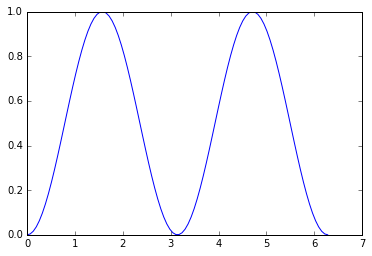

In [514]:
%matplotlib inline
from matplotlib.pyplot import *
from math import pi
from math import sin
from math import sqrt
from time import time
import numpy as np
d = 2 * pi / 7
x = np.array(np.zeros(8))
y = np.array(np.zeros(8))
t = np.array(np.zeros(9))

for i in range(8):
    x[i] = i * d
    y[i] = (sin(x[i]))**2

dx = np.array(np.zeros(100))
dy = np.array(np.zeros(100))

for i in range(100):
    dx[i] = i * (2 * pi / 99)
    dy[i] = sin(dx[i])**2
plot(dx, dy)
show()

Here we use Newton method from order 1 to 7. Here we also take a time for each method. Array $ny[i]$ contains calculated values of $y$ 

In [515]:
def f(l, r):
    if ((l - 1) == r):
        return (y[l] - y[r]) / (x[l] - x[r])
    else:
        return (f(l, r + 1) - f(l - 1, r))/(x[l]-x[r])

def ni(n, xx):
    ff = b[0]
    m = 1
    for i in range(1, n + 1):
        m *= (xx - x[i - 1])
        ff += f(i, 0) * m
    return ff

ny = np.array(np.zeros((7, 100), float))
for i in range(7):
    start = time()
    for w in range(100):
        for j in range(100):
            ny[i][j] = ni(i + 1, dx[j])
    end = time()
    t[i] = end - start
t /= 100

Here we use quadratic interpolation. We calculate coefficients of quadratic function and time of this method. Finally values of $y$ in array $qy$

In [516]:
for w in range(100):
    start = time()
    n = 7;
    B = np.array(np.zeros(20))
    #Create matrix B
    for i in range(n - 1):
        B[i * 2] = y[i + 1] 
        B[i * 2 + 1] = y[i + 1]
    B[12] = y[0]
    B[13] = y[7]

    A = np.zeros((20,20),float);

    #Create Matrix A
    for i in range(2, n + 1):
        p = i - 1
        #first line
        if ((p - 1) * 3 - 1 >= 0):
            A[(i - 2)*2][(p - 1) * 3 - 1] = x[i - 1]**2
        A[(i-2)*2][(p - 1) * 3] = x[i - 1]
        A[(i-2)*2][(p - 1) * 3 + 1] = 1
        #second line
        A[(i-2)*2+1][(i - 1) * 3 - 1] = x[i-1]**2
        A[(i-2)*2+1][(i - 1) * 3] = x[i-1]
        A[(i-2)*2+1][(i - 1) * 3 + 1] = 1        
    A[12][0] = x[0]
    A[12][1] = 1
    A[13][17] = x[n]**2
    A[13][18] = x[n]
    A[13][19] = 1
    for i in range(2, n + 1):
        p = i - 1
        A[12+i][(p - 1) * 3 - 1] = 2 * x[i-1]
        A[12+i][(p - 1) * 3] = 1
        A[12+i][p * 3 - 1] = -2 * x[i-1]
        A[12+i][p * 3] = -1

    a = np.array(np.zeros(8))
    b = np.array(np.zeros(8))
    c = np.array(np.zeros(8))
    coef = np.array(np.zeros(20))
    coef = np.linalg.solve(A,B)
    for i in range(1, n + 1):
        if (i != 1):
            a[i] = coef[(i - 1) * 3 - 1] 
        b[i] = coef[(i - 1) * 3]
        c[i] = coef[(i - 1) * 3 + 1]

    qy = np.array(np.zeros(100))
    j = 0;
    for i in range(100):
        if (dx[i] > x[j + 1]):
            j += 1
        if (j < 7):
            qy[i] = a[j + 1] * (dx[i]**2) + b[j + 1] * dx[i] + c[j + 1]
        else:
            qy[i] = a[j] * (dx[i]**2) + b[j] * dx[i] + c[j]
    end = time()
    t[7] += end - start
t[7] /= 100

Here we use cubic method. We again calculate time of this method and values of $y$ in array $cy$

In [517]:
def cubic(ii, xx):
    return fd[ii - 1] / (6 * (x[ii]  - x[ii - 1])) * ((x[ii] - xx)**3) + (fd[ii] / (6 * (x[ii] - x[ii - 1]))) * ((xx - x[ii - 1])**3) + (y[ii-1] / (x[ii] - x[ii - 1]) - fd[ii-1]*(x[ii] - x[ii - 1])/6) * (x[ii] - xx) + (y[ii] / (x[ii] - x[ii - 1]) - fd[ii] * (x[ii] - x[ii - 1]) / 6) * (xx - x[ii - 1])
for w in range(100):
    A1 = np.zeros((6, 6),float);
    B1 = np.array(np.zeros(6))

    start = time()

    for i in range(1, 7):
        if (i != 1):
            A1[i - 1][i - 2] = x[i] - x[i - 1]
        A1[i - 1][i - 1] = 2 * (x[i + 1] - x[i - 1])
        if (i != 6):
            A1[i - 1][i] = x[i + 1] - x[i]
        B1[i - 1] = 6/(x[i + 1] - x[i])*(y[i + 1] - y[i]) + 6 / (x[i] - x[i - 1]) * (y[i - 1] - y[i])

    temp = np.linalg.solve(A1,B1)
    fd = np.array(np.zeros(8))
    for i in range(6):
        fd[i + 1] = temp[i]

    cy = np.array(np.zeros(100))
    j = 0;
    for i in range(100):
        if (dx[i] > x[j + 1]):
            j += 1
        cy[i] = cubic(j + 1, dx[i])
    end = time()
    t[8] += end - start
t[8] /= 100

Now we calculate standard error of 1-7 order polynomial. Also you can see graph of each method with true values of $y$ and values of $f(x)$

Newton range-1
Standard error -  2.09447625257


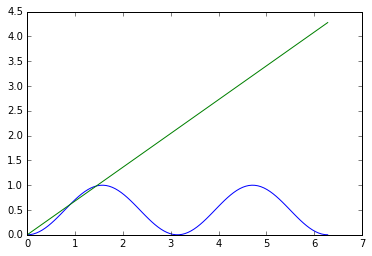

Newton range-2
Standard error -  0.689757512053


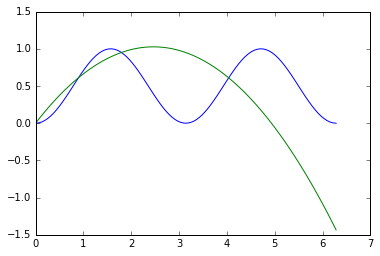

Newton range-3
Standard error -  10.7301217137


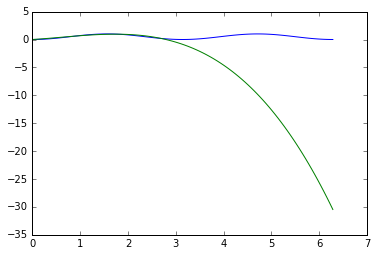

Newton range-4
Standard error -  17.4272879163


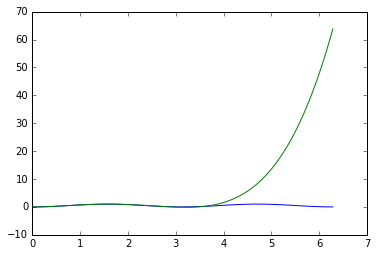

Newton range-5
Standard error -  6.84599803468


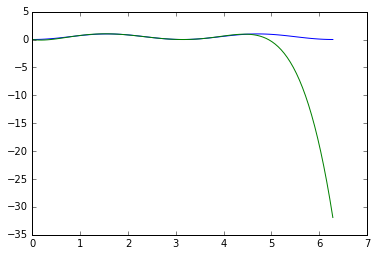

Newton range-6
Standard error -  0.0983797566845


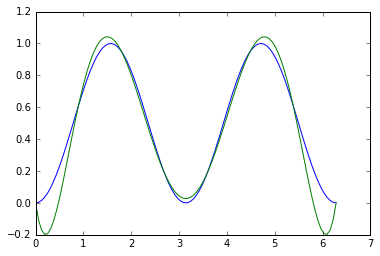

Newton range-7
Standard error -  0.0983797566845


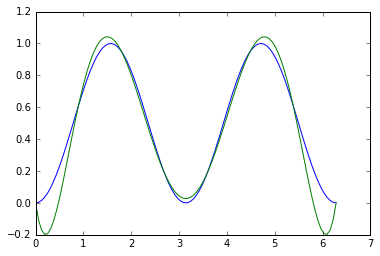

In [518]:
r1 = np.array(np.zeros(9))
r2 = ["", "", "", "", "", "", "", "", ""]

n = 100
#Error for Newton(Range 1-7)
errn = np.array(np.zeros(7))
for i in range(7):
    for j in range(100):
        errn[i] += (ny[i][j] - dy[j])**2
    errn[i] /= 100
    errn[i] = sqrt(errn[i])
    print("Newton range-" + chr(i + 49))
    print("Standard error - ",errn[i])
    plot(dx, dy)
    plot(dx, ny[i])
    show()
    r1[i] = 1 / errn[i]
    r2[i] = "Newton-" + chr(i+49)

Here the same operations with standard error and graphs of splyne methods: quadratic and cubic

Quadratic interpolation
Standard error -  0.12185010298724339


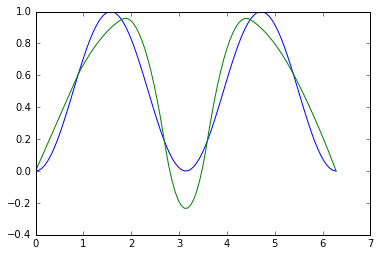

Cubic interpolation
Standard error -  0.04784786540070078


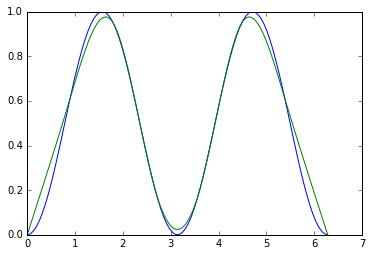

In [519]:
#Error for quadratic
errq = 0
for i in range(100):
    errq += (dy[i] - qy[i])**2
errq /= 100
errq = sqrt(errq)
print("Quadratic interpolation")
print("Standard error - ", errq)
plot(dx, dy)
plot(dx, qy)
show()
r1[7] = 1 / errq
r2[7] = "Quadratic"
#Error for cubic
errc = 0
for i in range(100):
    errc += (dy[i] - cy[i])**2
errc /= 100
errc = sqrt(errc)
print("Cubic interpolation")
print("Standard error - ", errc)
plot(dx, dy)
plot(dx, cy)
show()
r1[8] = 1 / errc
r2[8] = "Cubic"

Finally we obtain Accuracy, Computational cost and Rank of each method

In [520]:
print("Accuracy")
for i in range(9):
    print(r2[i] + "'s", "accuracy:", r1[i])
print()
print("Computational cost")
for i in range(9):
    r1[i] /= t[i]
    print(r2[i] + " time - ", t[i])
print()
#Sort by rank of Accuracity/Computational cost
for i in range(9):
    for j in range(i, 9):
        if (r1[i] < r1[j]):
            p = r1[i]
            r1[i] = r1[j]
            r1[j] = p
            p = r2[i]
            r2[i] = r2[j]
            r2[j] = p
print("Rank")
for i in range(9):
    print(chr(i + 49) + ")", r2[i] + "'s", "ratio:", r1[i])

Accuracy
Newton-1's accuracy: 0.477446329972
Newton-2's accuracy: 1.44978486283
Newton-3's accuracy: 0.0931955877746
Newton-4's accuracy: 0.0573812749755
Newton-5's accuracy: 0.146070740151
Newton-6's accuracy: 10.1646927549
Newton-7's accuracy: 10.1646927549
Quadratic's accuracy: 8.20680471731
Cubic's accuracy: 20.899573923

Computational cost
Newton-1 time -  0.00116034984589
Newton-2 time -  0.00217433691025
Newton-3 time -  0.00476016521454
Newton-4 time -  0.00968042612076
Newton-5 time -  0.0193376064301
Newton-6 time -  0.0421089982986
Newton-7 time -  0.0705922985077
Quadratic time -  0.00096097946167
Cubic time -  0.00281226158142

Rank
1) Quadratic's ratio: 8540.0417435
2) Cubic's ratio: 7431.58960073
3) Newton-2's ratio: 666.771030745
4) Newton-1's ratio: 411.467568737
5) Newton-6's ratio: 241.390039317
6) Newton-7's ratio: 143.99152556
7) Newton-3's ratio: 19.5782254553
8) Newton-5's ratio: 7.55371357254
9) Newton-4's ratio: 5.92755672733


## Discussion
As we said the best accuracy is the biggest value, and it belongs to Cubic method.
<span style="color:red">(There is no such thing as cubic method.)</span>
However it's difficult to predict a shortest time of method and ratio(rank), respectively. To have the best result(ratio) method should have the biggest accuracy and the shortest spent time. Best two methods in Rank are Cubic and Quadratic. Also from graphs it seems that 6-th and 7-th polynomial methods of this function are the same, both of them have the same standard error.   

## Conclusion
We tested each method 100 times, we calculated accuracy of each method by using standard error, we calculated computational cost(time) and provided a graphs of each method. Finally we can compare methods and we see ranked results. We can't exactly predict which of methods's the first in Rank. 

<span style="color:red">Grade is 95%</span>
